# __JCDS-0808-Alifia Adi Prasetyo || Market Basket Analysis (MBA)__

In [1]:
import pandas as pd

## __Load Dataset__

In [2]:
path = "C:\\Users\\Zein\\Downloads\\Groceries data.csv\\Groceries data.csv"

In [3]:
df = pd.read_csv (path) 
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


---

## __Data Cleansing__

In [4]:
df_clean = df.copy()

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [6]:
df_clean["itemDescription"]

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

### __1. Missing Values__

In [7]:
df_clean.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [8]:
df_clean.duplicated().sum()

np.int64(759)

In [9]:
df_clean.drop_duplicates(inplace=True)

In [10]:
df_clean.duplicated().sum()

np.int64(0)

### __Mengapa perlu dihapus dalam pemrosesan data di Market Basket Analaysis (MBA) ?__
  - Karna kita hanya ingin melihat suatu barang ada di dalam keranjang atau tidak. Berbeda dengan analisis kuantitas seperti (berapa banyak susu, berapa banyak roti) di dalam keranjang atau yang dibeli, kalau ini dinamakan analisis penjualan atau demand forecasting

### __2. Mengubah tipe data__ 

In [11]:
df["Date"].dtype

dtype('O')

In [12]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce', dayfirst=True)

C:\Users\Zein\AppData\Local\Temp\ipykernel_61384\1329256132.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce', dayfirst=True)


In [13]:
df_clean["Date"].dtype

dtype('<M8[ns]')

### __3. Standarisasi itemDescription (lowercase + strip spasi)__

In [14]:
df_clean['itemDescription'] = df_clean['itemDescription'].str.strip().str.lower()

In [15]:
df_clean['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese',
       'liquor', 'pickled vegetables', 'liquor (appetizer)

### __4. Cek duplikasi (member_number + date + itemDescription)__

In [16]:
duplicates = df_clean.duplicated(subset=['Member_number', 'Date', 'itemDescription']).sum()
duplicates

np.int64(0)

---

## __Exploratory Data Analysis (EDA)__

### __1. Distribusi jumlah transaksi per hari/bulan__

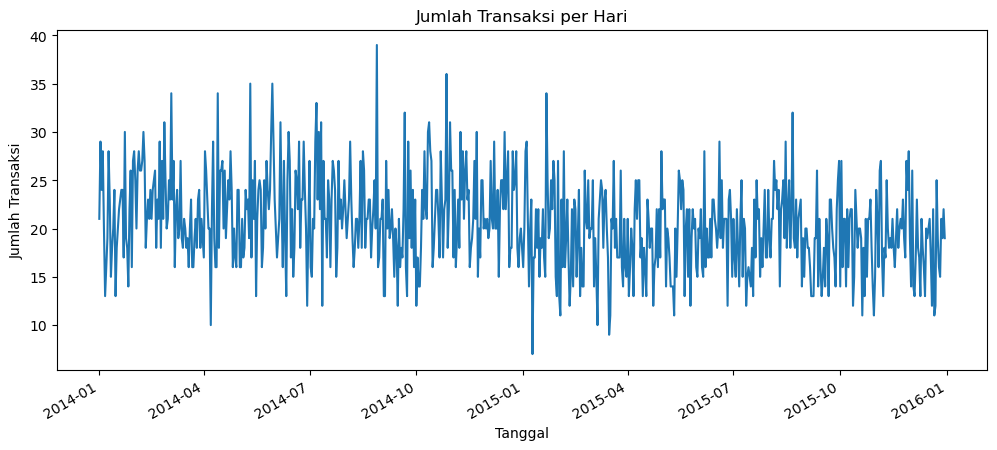

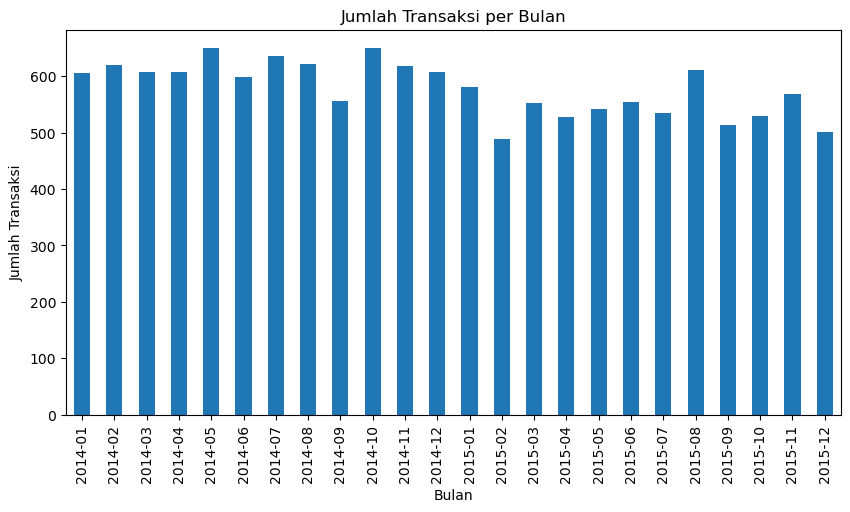

In [17]:
import matplotlib.pyplot as plt

# jumlah transaksi per hari
trans_per_day = df_clean.groupby("Date")["Member_number"].nunique()

plt.figure(figsize=(12,5))
trans_per_day.plot()
plt.title("Jumlah Transaksi per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.show()

# jumlah transaksi per bulan
trans_per_month = df_clean.groupby(df_clean["Date"].dt.to_period("M"))["Member_number"].nunique()

plt.figure(figsize=(10,5))
trans_per_month.plot(kind="bar")
plt.title("Jumlah Transaksi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

**Insight**: Dari visualisasi, terlihat tren jumlah transaksi harian yang cukup fluktuatif.  

Ketika diaggregasi bulanan, ada bulan-bulan dengan transaksi lebih tinggi dibanding bulan lain, yang bisa jadi indikasi adanya musim belanja (seasonality) atau promo tertentu.

### __2. Top 10 produk paling sering dibeli__

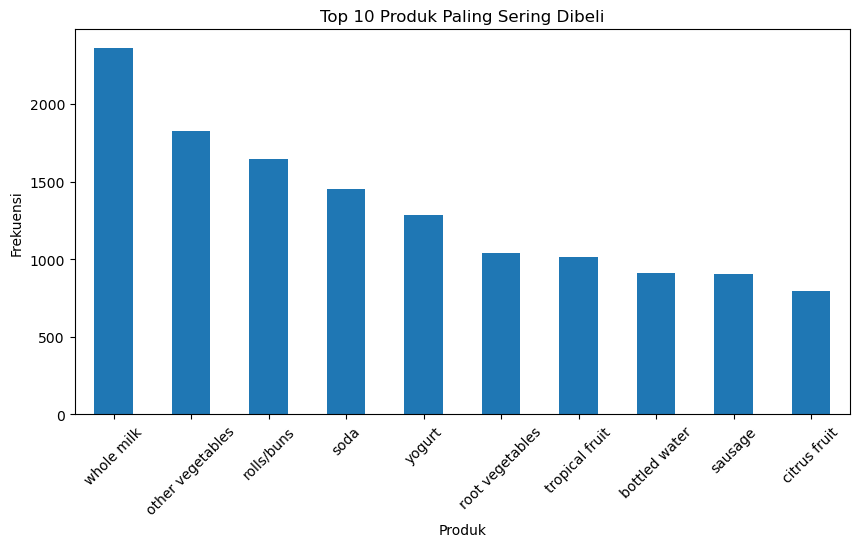

In [18]:
top_items = df_clean["itemDescription"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_items.plot(kind="bar")
plt.title("Top 10 Produk Paling Sering Dibeli")
plt.xlabel("Produk")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

**Insight**: Produk yang paling sering muncul dalam keranjang adalah `whole milk`.  

Produk-produk ini merupakan **fast-moving items** yang bisa diprioritaskan dalam stok, display toko, maupun strategi promosi.

### __3. Rata-rata jumlah item per keranjang__

Rata-rata jumlah item per keranjang: 2.539998663369645
Maksimal item dalam keranjang: 10


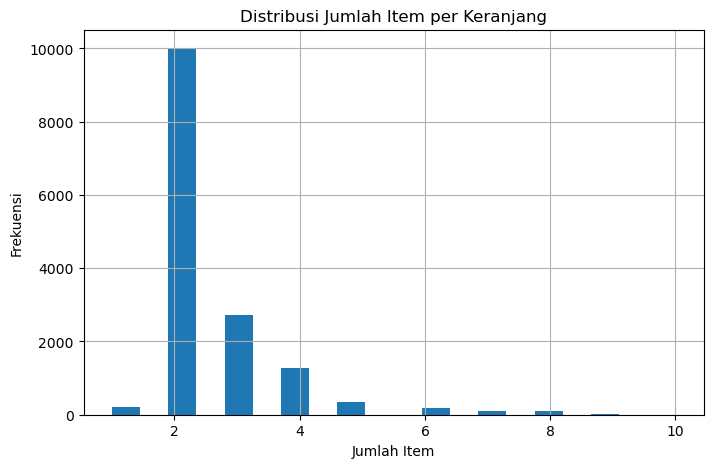

In [19]:
# buat keranjang berdasarkan member + tanggal
basket_size = df_clean.groupby(["Member_number", "Date"])["itemDescription"].count()

print("Rata-rata jumlah item per keranjang:", basket_size.mean())
print("Maksimal item dalam keranjang:", basket_size.max())

plt.figure(figsize=(8,5))
basket_size.hist(bins=20)
plt.title("Distribusi Jumlah Item per Keranjang")
plt.xlabel("Jumlah Item")
plt.ylabel("Frekuensi")
plt.show()

**Insight**: 
- Mayoritas transaksi hanya berisi 2 item -> Terlihat puncak distribusi di angka 2 dengan frekuensi yang sangat tinggi (sekitar 10.000 transaksi). Artinya, sebagian besar konsumen membeli barang dalam jumlah kecil.
- Jumlah item lebih dari 4 jarang terjadi -> Setelah 4 item, frekuensinya turun drastis. Hanya sebagian kecil konsumen yang membeli 5 item atau lebih dalam satu keranjang.
- Pola belanja cenderung sederhana -> Konsumen kemungkinan besar membeli barang-barang pelengkap atau kebutuhan kecil, bukan melakukan pembelian besar dalam sekali transaksi.

### __4. Korelasi Antar Produk Top 10__

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

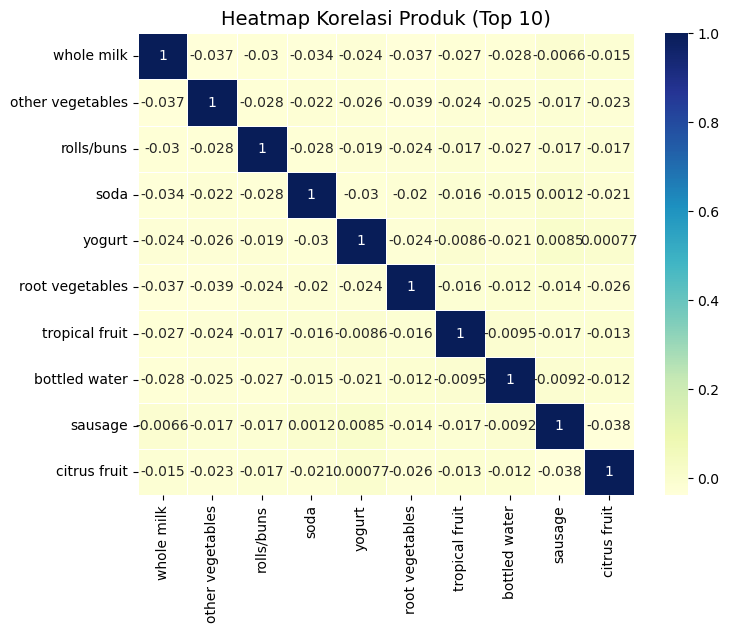

In [37]:
# ambil 10 produk paling populer
top_items = basket_onehot.sum().sort_values(ascending=False).head(10).index

# filter basket_onehot hanya untuk produk tersebut
basket_top = basket_onehot[top_items]

# hitung korelasi antar top produk
corr_matrix = basket_top.corr()

# bikin heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap Korelasi Produk (Top 10)", fontsize=14)
plt.show()

1. Nilai korelasi mendekati 0
- Mayoritas hubungan antar produk punya korelasi sangat rendah (sekitar -0.03 s/d +0.01).
Artinya, tidak ada hubungan linear yang kuat antara produk-produk top 10 ini. Konsumen yang membeli satu produk belum tentu membeli produk lain secara konsisten.

2. Produk yang cenderung berdiri sendiri
- Contoh: whole milk, other vegetables, dan soda → korelasi mereka dengan produk lain negatif kecil.
Bisa diartikan produk ini dibeli secara independen, bukan karena dipengaruhi oleh pembelian produk lain.

3. Korelasi positif kecil (tapi ada)
- Misalnya tropical fruit dengan bottled water (~0.0095) atau yogurt dengan sausage (~0.0085).
Walaupun kecil, ini mengindikasikan ada pola belanja bersama, tapi sangat lemah.

---

## __Transformasi data menjadi basket format__

In [20]:
basket_df = df_clean.groupby(["Member_number", "Date"])["itemDescription"].apply(list).reset_index()
basket_df.head(10)

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"
5,1001,2014-07-02,"[sausage, whole milk, rolls/buns]"
6,1001,2014-12-12,"[whole milk, soda]"
7,1001,2015-01-20,"[frankfurter, soda, whipped/sour cream]"
8,1001,2015-02-05,"[frankfurter, curd]"
9,1001,2015-04-14,"[beef, white bread]"


---

## __Transformasi ke format transaksi list__

In [21]:
transactions = basket_df["itemDescription"].tolist()
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene articles'],
 

In [22]:
# !where python 

In [23]:
# !pip install mlxtend # Install modul mlxtend

In [24]:
from mlxtend.preprocessing import TransactionEncoder

In [25]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_onehot = pd.DataFrame(te_ary, columns=te.columns_)

In [26]:
basket_onehot

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


---

## __Frequent Itemset Mining__
  - Data transaksi yang sudah diubah ke bentuk one-hot encoding (True/False atau 1/0 untuk setiap produk).

In [27]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_onehot, min_support=0.001, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False).head()

,support,itemsets
146,0.157923,(whole milk)
89,0.122101,(other vegetables)
108,0.110005,(rolls/buns)
122,0.097106,(soda)
147,0.085879,(yogurt)


`from mlxtend.frequent_patterns import apriori`
→ Mengimpor fungsi apriori dari library mlxtend.
Fungsi ini dipakai untuk mencari frequent itemsets (kombinasi item yang sering muncul bersama dalam transaksi).

`frequent_itemsets = apriori(basket_onehot, min_support=0.001, use_colnames=True)`

- basket_onehot
  -> dataset transaksi yang sudah diubah ke format one-hot encoding (tiap produk berupa kolom dengan nilai 1 kalau dibeli, 0 kalau tidak).

- min_support=0.001
  -> aturan minimum supaya itemset dianggap "frequent".
  Artinya: hanya itemset yang muncul di ≥0.1% dari seluruh transaksi yang akan disimpan.

- use_colnames=True
  -> agar hasil itemsets menampilkan nama produk (contoh: whole milk, soda), bukan hanya index kolom.

Hasilnya adalah DataFrame berisi dua kolom utama:

- support → seberapa sering itemset muncul di semua transaksi.
- itemsets → kombinasi produk yang termasuk frequent.

`frequent_itemsets.sort_values(by="support", ascending=False).head()`
- sort_values: mengurutkan itemsets berdasarkan nilai support.
- ascending=False: urut dari yang terbesar ke terkecil.
- head(): hanya menampilkan 5 itemset teratas.

Output yang muncul:

Produk yang paling sering muncul di transaksi.

Contoh:
- whole milk -> support 0.157923 ≈ muncul di 15.8% transaksi
- other vegetables -> 12.2% transaksi
- dst.

---

## __Generate Association Rules__
  - Dari itemset yang sudah terbentuk, buat rules dengan metrik confidence dan lift.

In [28]:
frequent_itemsets.head(10)

,support,itemsets
0,0.001470,(abrasive cleaner)
1,0.001938,(artif. sweetener)
2,0.008087,(baking powder)
3,0.001136,(bathroom cleaner)
4,0.033950,(beef)
5,0.021787,(berries)
6,0.016574,(beverages)
7,0.045312,(bottled beer)
8,0.060683,(bottled water)
9,0.002540,(brandy)


In [29]:
from mlxtend.frequent_patterns import association_rules

In [30]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules.sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
129,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
121,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847
126,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
98,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,1.0,0.000172,1.022008,0.103985,0.010081,0.021534,0.093318
124,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
128,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
28,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,1.0,0.000042,1.005814,0.030162,0.008499,0.005781,0.085839
44,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,1.0,0.000038,1.002659,0.014188,0.015904,0.002652,0.088754
7,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549
35,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,1.0,-0.000007,0.998743,-0.006759,0.006533,-0.001259,0.081817


In [31]:
print("Support")
print(rules['support'].describe())
print("\nConfidence")
print(rules['confidence'].describe())
print("\nLift")
print(rules['lift'].describe())

Support
count    130.000000
mean       0.002945
std        0.002539
min        0.001002
25%        0.001337
50%        0.001938
75%        0.003793
max        0.014837
Name: support, dtype: float64

Confidence
count    130.000000
mean       0.125880
std        0.021809
min        0.100000
25%        0.110293
50%        0.121906
75%        0.134806
max        0.255814
Name: confidence, dtype: float64

Lift
count    130.000000
mean       0.947387
std        0.241180
min        0.645777
25%        0.806678
50%        0.881796
75%        1.032466
max        2.182917
Name: lift, dtype: float64


In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.sort_values(by="lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1231,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,1.0,0.000797,1.013532,0.576701,0.020992,0.013351,0.078050
1226,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
1227,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
1230,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650
452,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,1.0,0.000555,1.010726,0.417500,0.020731,0.010612,0.057141


In [33]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules[(rules['support'] >= 0.001) & (rules['confidence'] >= 0.1) & (rules['lift'] > 1)]
rules.sort_values(by="lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
0,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847


---

## __Insight Utama__

1. Produk Paling Sering Dibeli: Analisis  menunjukkan beberapa produk yang paling sering dibeli, seperti whole milk, other vegetables, rolls/buns, soda, dan yogurt. Ini mengindikasikan bahwa produk-produk ini adalah barang-barang kebutuhan sehari-hari yang sangat populer. Produk ini dapat menjadi daya tarik utama bagi pelanggan dan bisa menjadi pondasi strategi pemasaran.
2. Korelasi Antar Produk: Anda menemukan beberapa aturan asosiasi yang kuat, seperti:

- "other vegetables" -> "whole milk": Pelanggan yang membeli sayuran lain sering juga membeli susu.

- "rolls/buns" -> "whole milk": Pelanggan yang membeli roti/roti isi sering juga membeli susu.

- "yogurt" -> "whole milk": Pembeli yogurt cenderung membeli susu.

- "root vegetables" -> "whole milk": Pembeli sayuran akar sering membeli susu.

---

## __Rekomendasi Bisnis__

1. Strategi Penempatan Produk (Cross-merchandising): Letakkan produk yang sering dibeli bersamaan secara berdekatan.
- Tempatkan "whole milk" di dekat "other vegetables," "rolls/buns," dan "yogurt" untuk mendorong pembelian impulsif.
- Buat area khusus untuk produk sarapan yang menggabungkan rolls/buns, whole milk, dan mungkin coffee atau butter.

2. Promosi Bundling (Paket Produk): Tawarkan paket diskon untuk produk yang sering dibeli bersamaan.
- Contohnya: "Beli rolls/buns dan dapatkan diskon 10% untuk whole milk."
- Buat paket Healthy Start yang berisi yogurt, whole milk, dan fruit.

3. Kampanye Pemasaran Bertarget: Gunakan wawasan ini untuk membuat iklan yang lebih efektif.
- Kirim email promosi kepada pelanggan yang baru-baru ini membeli other vegetables dengan penawaran khusus untuk whole milk.
- Saat pelanggan menambahkan rolls/buns ke keranjang belanja online, tampilkan rekomendasi untuk whole milk.

4. Optimasi Inventaris: Karena whole milk adalah produk "pasangan" yang sangat penting, pastikan stoknya selalu tersedia. Kelangkaan produk ini dapat menghambat penjualan produk lain.